In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import numpy as np
from scipy.spatial.transform import Rotation

from ggcnn_grasp_planner_pckg.dataloading.datasets import YCBSimulationData
from ggcnn_grasp_planner_pckg.ggcnn_grasp_planner import ggcnn_get_grasp

In [2]:
dataset = YCBSimulationData(
    Path("/home/moritz/Documents/ycb_sim_data_1")
)

In [3]:
sample = dataset[9]

Position Image Perspective (x, y): (376,246)
Position Cam Perspective (x,y,z): [0.10174736066096418, 0.010552203389677087, 1.0190109]
CAM_QUAT [ 0.70710678 -0.70710678  0.          0.        ]
W<X<Y<Z
0.7071067812 -0.7071067812 0.0 0.0
CAM_ROT [[ 1.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.80493415e-11  1.00000000e+00]
 [-0.00000000e+00 -1.00000000e+00 -3.80493415e-11]]
Inputs to calculate p_world--p_cam [[0.10174736]
 [0.0105522 ]
 [1.0190109 ]] cam_rot_inv [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -3.80493415e-11 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -3.80493415e-11]] cam_pos [[0.5]
 [0. ]
 [1. ]]
Position Image Perspective (x, y): (307,216)
Position Cam Perspective (x,y,z): [-0.02361992301058097, -0.04220881355870835, 1.0190109]
CAM_QUAT [ 0.70710678 -0.70710678  0.          0.        ]
W<X<Y<Z
0.7071067812 -0.7071067812 0.0 0.0
CAM_ROT [[ 1.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.80493415e-1

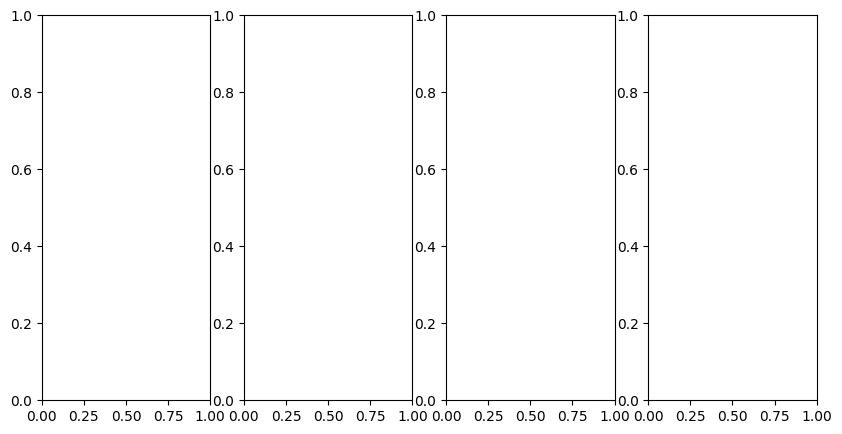

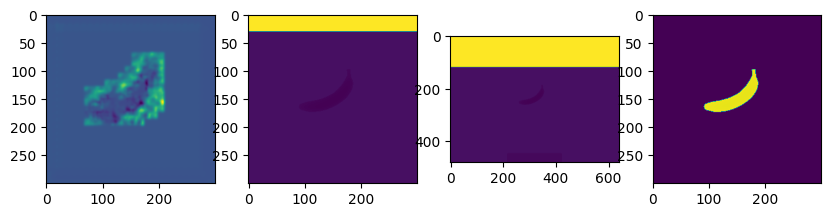

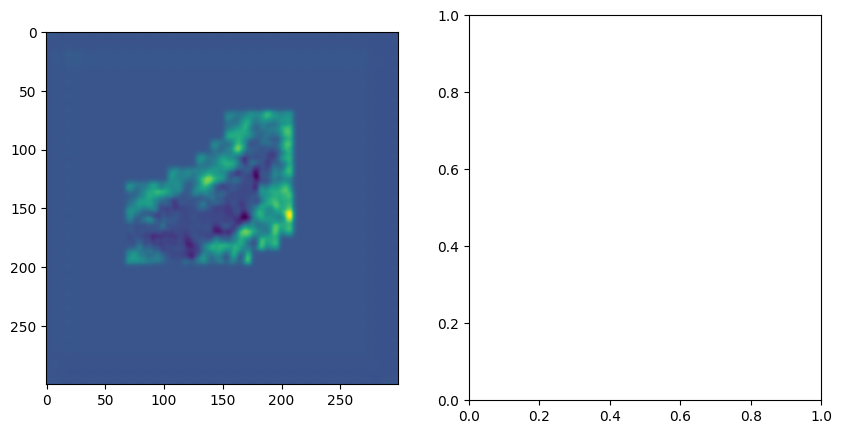

In [5]:
grasp = ggcnn_get_grasp(
    sample.depth,
    sample.cam_intrinsics,
    sample.cam_pos,
    Rotation.from_matrix(sample.cam_rot).as_quat(),
    50,
    sample.segmentation,
)